In [ ]:
import pandas as pd
import numpy as np

import datetime as dt

from dateutil.relativedelta import relativedelta


import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv')

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,102,2015-07-04,Chris Froome,Team Sky,3360.3,84.770556,0.016944,1,16,1.86,69.0,30,1985-05-20,NaN,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain
102,103,2016-07-02,Chris Froome,Team Sky,3529.0,89.080000,0.067778,2,14,1.86,69.0,31,1985-05-20,NaN,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain
103,104,2017-07-01,Chris Froome,Team Sky,3540.0,86.348611,0.015000,0,15,1.86,69.0,32,1985-05-20,NaN,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain
104,105,2018-07-07,Geraint Thomas,Team Sky,3349.0,83.286944,0.016944,2,11,1.83,71.0,32,1986-05-25,NaN,Geraint Howell Thomas,G,Cardiff,Wales,Great Britain


In [ ]:
td_france=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv')

In [ ]:
td_france.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   edition        106 non-null    int64  
 1   start_date     106 non-null    object 
 2   winner_name    106 non-null    object 
 3   winner_team    106 non-null    object 
 4   distance       106 non-null    float64
 5   time_overall   98 non-null     float64
 6   time_margin    98 non-null     float64
 7   stage_wins     106 non-null    int64  
 8   stages_led     106 non-null    int64  
 9   height         66 non-null     float64
 10  weight         67 non-null     float64
 11  age            106 non-null    int64  
 12  born           106 non-null    object 
 13  died           56 non-null     object 
 14  full_name      46 non-null     object 
 15  nickname       74 non-null     object 
 16  birth_town     106 non-null    object 
 17  birth_country  106 non-null    object 
 18  nationalit

convert start date

In [ ]:
td_france.start_date.dtypes

dtype('O')

In [ ]:
td_france['start_date']=pd.to_datetime(td_france['start_date'])

In [ ]:
td_france.head(3)

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France


In [ ]:
td_france.start_date.dtypes

dtype('<M8[ns]')

winner per stage type

What relationship is there between a winners age and the number of stages led.

get winners age

In [ ]:
td_france['born']=pd.to_datetime(td_france['born'])
td_france['died']=pd.to_datetime(td_france['died'])

In [ ]:
td_france.head(3)

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France


In [ ]:
td_france.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


In [ ]:
td_france.head(3)

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France


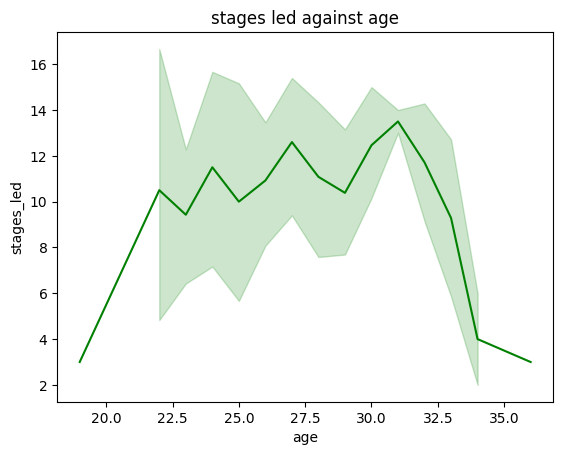

In [ ]:
plt.figuresize=figsize=(20,8)

sns.lineplot(x="age",y="stages_led",data=td_france, color = 'green').set(title="stages led against age")

plt.show()

Sort by the most recent winning and find the winner's nationality and display the top. Use this image as inspiration


In [ ]:
winning_ordered=td_france['start_date'].value_counts().nlargest(100).index

In [ ]:
winning_ordered

DatetimeIndex(['1903-07-01', '1993-07-03', '1991-07-06', '1990-06-30',
               '1989-07-01', '1988-07-02', '1987-07-01', '1986-07-04',
               '1985-06-28', '1984-06-29', '1983-07-01', '1982-07-02',
               '1981-06-25', '1980-06-26', '1979-06-27', '1978-06-29',
               '1977-06-30', '1976-06-24', '1975-06-26', '1974-06-27',
               '1973-06-30', '1972-07-01', '1971-06-26', '1970-06-27',
               '1969-06-28', '1992-07-04', '1994-07-02', '1904-07-02',
               '1995-07-01', '2018-07-07', '2017-07-01', '2016-07-02',
               '2015-07-04', '2014-07-05', '2013-06-29', '2012-06-20',
               '2011-07-02', '2010-07-03', '2009-07-04', '2008-07-05',
               '2007-07-07', '2006-07-01', '2005-07-02', '2004-07-03',
               '2003-07-05', '2002-07-06', '2001-07-07', '2000-07-01',
               '1999-07-03', '1998-07-11', '1997-07-05', '1996-06-29',
               '1968-06-27', '1967-06-29', '1966-06-21', '1965-06-22',
      

In [ ]:
winning_ordered_df =td_france[td_france['start_date'].isin(winning_ordered)]

In [ ]:
winning_ordered_df

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,101,2014-07-05,Vincenzo Nibali,Astana,3660.5,89.985000,0.118611,4,19,1.80,65.0,29,1984-11-14,NaT,NaN,"Lo Squalo (The Shark), 'il Roditore' (The Nibb...",Messina,Italy,Italy
101,102,2015-07-04,Chris Froome,Team Sky,3360.3,84.770556,0.016944,1,16,1.86,69.0,30,1985-05-20,NaT,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain
102,103,2016-07-02,Chris Froome,Team Sky,3529.0,89.080000,0.067778,2,14,1.86,69.0,31,1985-05-20,NaT,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain
103,104,2017-07-01,Chris Froome,Team Sky,3540.0,86.348611,0.015000,0,15,1.86,69.0,32,1985-05-20,NaT,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain


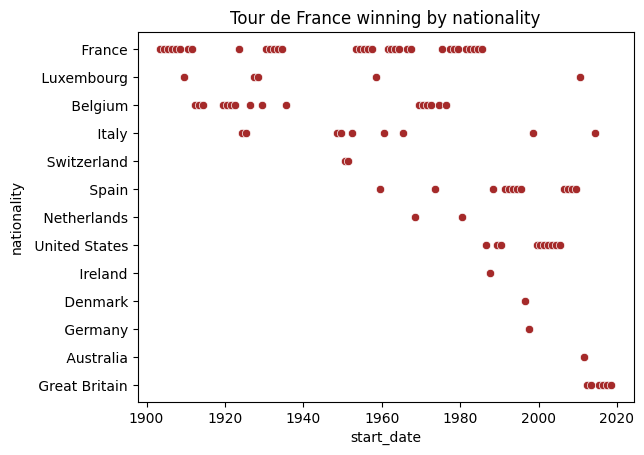

In [ ]:
sns.scatterplot(
    data=winning_ordered_df, x= "start_date", y="nationality",sizes=(150, 300), legend="full" ,color = 'brown'
).set(title='Tour de France winning by nationality')

plt.show()

Number of stages leg by each age group


In [ ]:
stages_bygroup= td_france['stages_led'].value_counts().nlargest(20).index

In [ ]:
stages_bygroup

Int64Index([14, 13, 8, 6, 12, 3, 15, 11, 7, 2, 5, 10, 18, 17, 16, 22, 19, 21,
            4, 1],
           dtype='int64')

In [ ]:
stages_bygroup_df= td_france[td_france['stages_led'].isin(stages_bygroup)]

In [ ]:
stages_bygroup_df.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


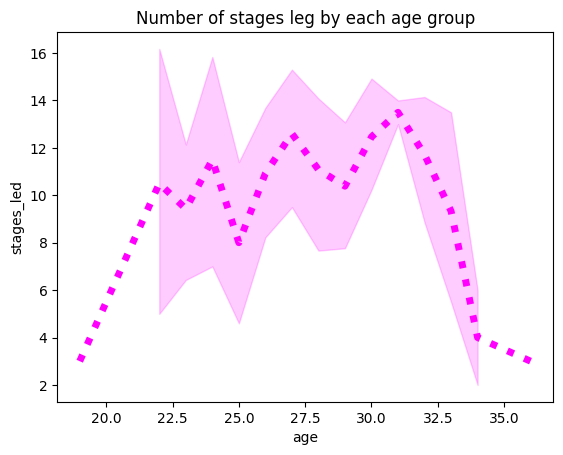

In [ ]:
plt.figuresize=figsize=(20,8)

sns.lineplot(x="age",y="stages_led",data=stages_bygroup_df,linestyle='dotted', color='magenta', linewidth=5).set(title="Number of stages leg by each age group")

plt.show()

The distribution of stage wins for the whole duration


In [ ]:
td_france.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


In [ ]:
stage_wins_cumulative=td_france['stage_wins'].value_counts().sort_index().dropna()


In [ ]:
stage_wins_cumulative

0     8
1    22
2    26
3    17
4    15
5     9
6     5
7     2
8     2
Name: stage_wins, dtype: int64

In [ ]:
stage_wins_cumulative_df= td_france[td_france['stage_wins'].isin(stage_wins_cumulative)]

In [ ]:
stage_wins_cumulative_df

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France
5,6,1908-07-13,Lucien Petit-Breton,Peugeot–Wolber,4497.0,NaN,NaN,5,13,NaN,NaN,25,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France
8,9,1911-07-02,Gustave Garrigou,Alcyon–Dunlop,5343.0,NaN,NaN,2,13,NaN,NaN,26,1884-09-24,1963-01-28,Cyprien Gustave Garrigou,NaN,Vabres,France,France
14,15,1921-06-26,Léon Scieur,La Sportive,5485.0,221.840556,0.305000,2,14,NaN,NaN,33,1888-03-18,1969-10-07,NaN,NaN,Florennes,Belgium,Belgium
19,20,1926-06-20,Lucien Buysse,Automoto–Hutchinson,5745.0,238.740278,1.373611,2,8,NaN,NaN,33,1892-09-11,1980-01-03,NaN,NaN,Wontergem,Belgium,Belgium
21,22,1928-06-17,Nicolas Frantz,Alcyon–Dunlop,5476.0,192.816111,0.847222,5,22,NaN,NaN,28,1899-11-04,1985-11-08,NaN,NaN,Mamer,Luxembourg,Luxembourg
23,24,1930-07-02,André Leducq,Alcyon–Dunlop,4822.0,172.204444,0.237222,2,13,NaN,NaN,26,1904-02-27,1980-06-18,NaN,NaN,Saint-Ouen,France,France
31,32,1938-07-05,Gino Bartali,Italy,4694.0,148.486667,0.305000,2,8,1.72,66.0,23,1914-07-18,2000-05-05,NaN,"Gino the Pious, Ginettaccio, L'uomo di ferro, ...",Ponte e Ema,Italy,Italy


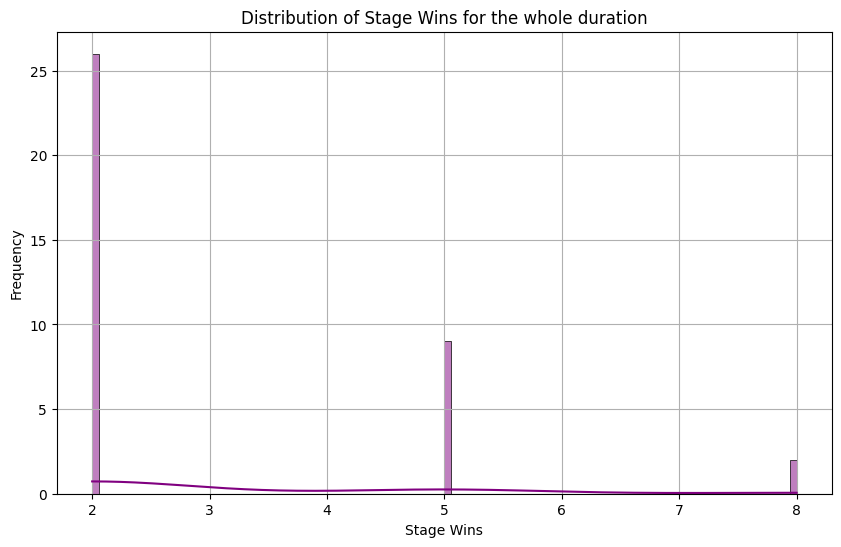

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=stage_wins_cumulative_df, x='stage_wins', color='purple',bins=100, kde=True)
plt.title('Distribution of Stage Wins for the whole duration')
plt.xlabel('Stage Wins')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The winner-team with the most stage wins and stages led.

In [ ]:
result=td_france.groupby(['winner_team','stage_wins','stages_led']).count

In [ ]:
result=td_france.dropna(how='all')

In [ ]:
result

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,102,2015-07-04,Chris Froome,Team Sky,3360.3,84.770556,0.016944,1,16,1.86,69.0,30,1985-05-20,NaT,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain
102,103,2016-07-02,Chris Froome,Team Sky,3529.0,89.080000,0.067778,2,14,1.86,69.0,31,1985-05-20,NaT,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain
103,104,2017-07-01,Chris Froome,Team Sky,3540.0,86.348611,0.015000,0,15,1.86,69.0,32,1985-05-20,NaT,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain
104,105,2018-07-07,Geraint Thomas,Team Sky,3349.0,83.286944,0.016944,2,11,1.83,71.0,32,1986-05-25,NaT,Geraint Howell Thomas,G,Cardiff,Wales,Great Britain


The winning time and how far the runner up is, i.e. how long did it take to win, with every edition. So in a sense checking, are there cyclist getting better bikes, or are they getting lazier/
What you need to do is plot a stackplot of those two variables against the edition on the x-axis. Make sure you take care of the missing values by dropping them.
This should allow you to plot the time_margin on top of the time_overall.

In [ ]:
# set seaborn style
sns.set_theme()

# Data
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]

# Plot
plt.stackplot(x,y, labels=['A','B','C'])
plt.legend(loc='upper left')
plt.show()